In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [93]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [94]:
#shape of data
print(test.shape)
print(train.shape)

(11709, 80)
(27321, 80)


In [95]:
train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [96]:
train.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [97]:
train.describe()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
count,27321.000000,0.0,27321.0,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,27321.000000,2.732100e+04,...,27115.000000,27115.000000,27115.000000,27115.000000,27115.000000,27053.000000,27130.000000,27130.000000,27130.000000,27130.000000
mean,257331.996303,NaN,140.0,85.646426,28.271806,50081.999524,596.507668,37.508813,-91.288394,1.295106e+08,...,40.319803,40.355099,22.178745,544.238432,2208.761903,0.640434,0.508300,0.047537,0.019089,0.100248
std,21343.859725,NaN,0.0,98.333097,16.392846,29558.115660,232.497482,5.588268,16.343816,1.275531e+09,...,5.886317,8.039585,2.540257,283.546896,1089.316999,0.226640,0.136860,0.037640,0.020796,0.049055
min,220342.000000,NaN,140.0,1.000000,1.000000,602.000000,201.000000,17.929085,-165.453872,4.113400e+04,...,16.008330,13.250000,0.556780,0.664700,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238816.000000,NaN,140.0,29.000000,13.000000,26554.000000,405.000000,33.899064,-97.816067,1.799408e+06,...,36.892050,34.916670,21.312135,355.995825,1471.000000,0.502780,0.425102,0.020810,0.004530,0.065800
50%,257220.000000,NaN,140.0,63.000000,28.000000,47715.000000,614.000000,38.755183,-86.554374,4.866940e+06,...,40.373320,40.583330,22.514410,503.643890,2066.000000,0.690840,0.526665,0.038840,0.013460,0.095205
75%,275818.000000,NaN,140.0,109.000000,42.000000,77093.000000,801.000000,41.380606,-79.782503,3.359820e+07,...,43.567120,45.416670,23.575260,680.275055,2772.000000,0.817460,0.605760,0.065100,0.027487,0.129000
max,294334.000000,NaN,140.0,840.000000,72.000000,99925.000000,989.000000,67.074018,-65.379332,1.039510e+11,...,79.837390,82.250000,30.241270,6197.995200,27250.000000,1.000000,1.000000,0.714290,0.714290,1.000000


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

In [100]:
##Figure out the primary key and look for the requirement of indexing.
#make UID as index

In [101]:
train.set_index(keys=['UID'],inplace=True)

In [102]:
test.set_index(keys=['UID'],inplace=True)

In [103]:
test.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [104]:
##Gauge the fill rate of variables and devise plan for missing value treatemnt.please explain explicitly the reason for the treatment.chosen for varibales

In [105]:
train.isna().sum().any()

True

In [106]:
test.isna().sum().any()

True

In [107]:
#print the only value which we have missing values
train.isna().sum()[test.isna().sum()>0]

BLOCKID                        27321
rent_mean                        314
rent_median                      314
rent_stdev                       314
rent_sample_weight               314
rent_samples                     314
rent_gt_10                       314
rent_gt_15                       314
rent_gt_20                       314
rent_gt_25                       314
rent_gt_30                       314
rent_gt_35                       314
rent_gt_40                       314
rent_gt_50                       314
hi_mean                          268
hi_median                        268
hi_stdev                         268
hi_sample_weight                 268
hi_samples                       268
family_mean                      298
family_median                    298
family_stdev                     298
family_sample_weight             298
family_samples                   298
hc_mortgage_mean                 573
hc_mortgage_median               573
hc_mortgage_stdev                573
h

In [108]:
train.isna().sum()[test.isna().sum()>0].shape

(59,)

In [109]:
test.isna().sum()[test.isna().sum()>0].shape

(59,)

In [110]:
#calculate precentage for missing values
precentage_train=train.isna().sum()/len(train)*100

In [111]:
precentage_train

BLOCKID        100.000000
SUMLEVEL         0.000000
COUNTYID         0.000000
STATEID          0.000000
state            0.000000
                  ...    
pct_own          0.980930
married          0.699096
married_snp      0.699096
separated        0.699096
divorced         0.699096
Length: 79, dtype: float64

In [112]:
precentage_train=pd.DataFrame(precentage_train,columns=['precentage og missing value'])

In [113]:
precentage_train

,precentage og missing value
BLOCKID,100.000000
SUMLEVEL,0.000000
COUNTYID,0.000000
STATEID,0.000000
state,0.000000
...,...
pct_own,0.980930
married,0.699096
married_snp,0.699096
separated,0.699096


In [114]:
precentage_train.sort_values(by=['precentage og missing value'],inplace=True,ascending=False)

In [115]:
precentage_train

,precentage og missing value
BLOCKID,100.000000
hc_samples,2.196113
hc_mean,2.196113
hc_median,2.196113
hc_stdev,2.196113
...,...
state,0.000000
zip_code,0.000000
city,0.000000
place,0.000000


In [116]:
precentage_test=test.isna().sum()/len(test)*100

In [117]:
precentage_test=pd.DataFrame(precentage_test,columns=['precentage og missing value'])

In [118]:
precentage_test.sort_values(by=['precentage og missing value'],inplace=True,ascending=False)

In [119]:
precentage_test

,precentage og missing value
BLOCKID,100.000000
hc_samples,2.476727
hc_mean,2.476727
hc_median,2.476727
hc_stdev,2.476727
...,...
type,0.000000
place,0.000000
city,0.000000
state,0.000000


In [120]:
#Dropping block id and sumlevel
train.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True)

In [121]:
test.drop(columns=['BLOCKID','SUMLEVEL'],inplace=True)

In [122]:
#colums in train data which are missing values
missing_value_train=[]
for col in train.columns:
    if train[col].isna().sum()!=0:
        missing_value_train.append(col)
    

In [123]:
missing_values_test=[]
for col in test.columns:
    if test[col].isna().sum()!=0:
        missing_values_test.append(col)

In [124]:
for col in train.columns:
    if col in (missing_value_train):
        train[col].replace(np.nan,train[col].mean(),inplace=True)

In [125]:
for col in test.columns:
    if col in (missing_values_test):
        test[col].replace(np.nan,test[col].mean(),inplace=True)

In [126]:
train.isna().sum().any()

False

In [127]:
test.isna().sum().any()

False

In [128]:
##Exploratory Data Analysis (EDA)
#Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. 
#Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [129]:
pip install pandasql

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [130]:
train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [131]:
from pandasql import sqldf
q1="Select place,pct_own,second_mortgage,lat,lng from train where pct_own>0.10 and second_mortgage<0.5 order by second_mortgage DESC LIMIT 2500;"


In [132]:
Query_fun=lambda q:sqldf(q,globals()) # SHIFT+TAB
df_train_location=Query_fun(q1)

In [133]:
df_train_location

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434
...,...,...,...,...,...
2495,Marina Del Rey,0.44682,0.06818,33.983203,-118.466139
2496,Raleigh City,0.12827,0.06818,35.757135,-78.704288
2497,Lochearn,0.84707,0.06815,39.353095,-76.733315
2498,Manteca City,0.67116,0.06814,37.732143,-121.242902


In [134]:
train['bad_debt'] = train['second_mortgage'] + train['home_equity'] - train['home_equity_second_mortgage']


In [135]:
#Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [136]:
df_ham=train.loc[train['city']=='Hamilton']
df_Man=train.loc[train['city']=='Manhattan']


In [137]:
df_box_city=pd.concat([df_ham,df_Man])

In [138]:
df_box_city.tail()

,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt
UID,,,,,,,,,,,,,,,,,,,,,
247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,...,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426
247221,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,...,22.58333,13.58297,881.65612,1949.0,0.16457,0.13823,0.02133,0.01231,0.08080,0.06985
247222,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785,...,28.50000,22.97004,401.88911,1171.0,0.33214,0.29648,0.03015,0.00000,0.11357,0.03581
247226,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66503,785,...,33.75000,21.63916,476.01198,1740.0,0.60948,0.61940,0.02572,0.00220,0.01837,0.19200
245107,197,17,Illinois,IL,Manhattan,Manhattan,Village,tract,60442,815,...,33.41667,20.40910,579.66259,2491.0,0.93544,0.67987,0.00597,0.00597,0.04775,0.17486


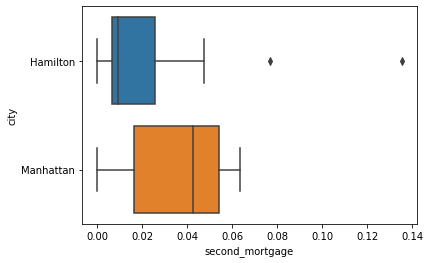

In [139]:
# create a boxplot city & second mortgage
sns.boxplot(data=df_box_city,x='second_mortgage',y='city')
plt.show()

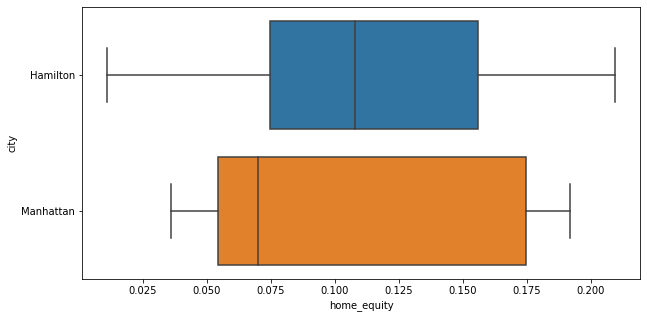

In [140]:
#city vs home equity
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='home_equity', y='city')
plt.show()

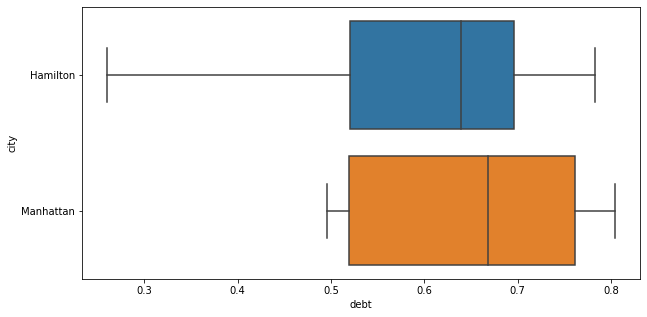

In [141]:
#debt vs city
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='debt', y='city')
plt.show()

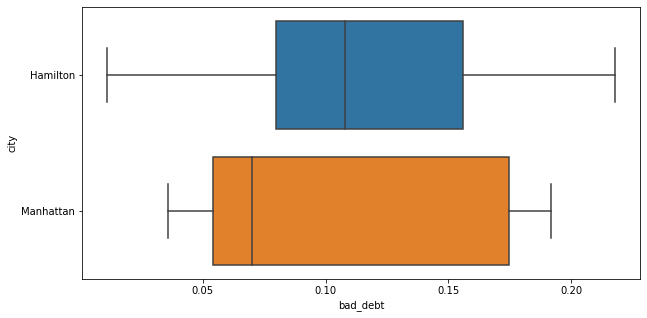

In [142]:
#bad debt vs city
plt.figure(figsize=(10,5))
sns.boxplot(data=df_box_city,x='bad_debt', y='city')
plt.show()

In [143]:
#Create a collated income distribution chart for family income, house hold income, and remaining income

In [144]:
train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

Text(0.5, 1.0, 'Family Income')

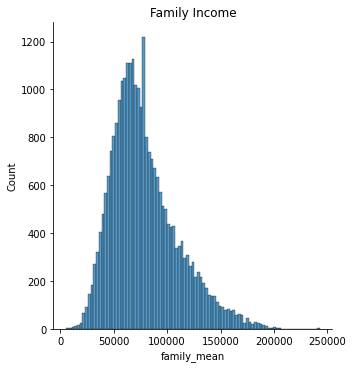

In [145]:
sns.displot(train['family_mean'])
plt.title('Family Income')

Text(0.5, 1.0, 'Household Income')

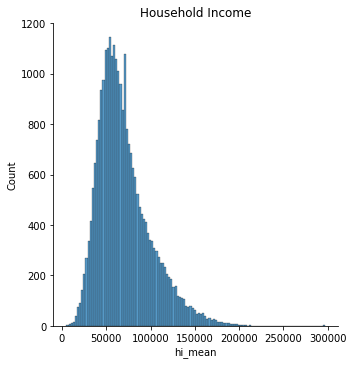

In [146]:
sns.displot(train['hi_mean'])
plt.title('Household Income')

Text(0.5, 1.0, 'Remaining Income')

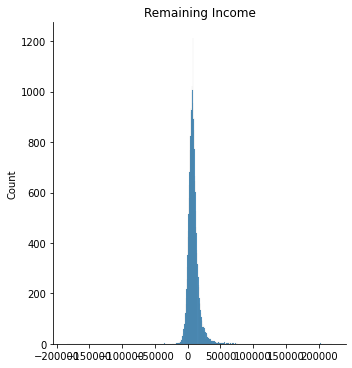

In [147]:
sns.displot(train['family_mean']-train['hi_mean'])
plt.title('Remaining Income')

In [148]:
##Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 

#Use pop and ALand variables to create a new field called population density

#Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

#Visualize the findings using appropriate chart type


In [149]:
train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pop', ylabel='Density'>

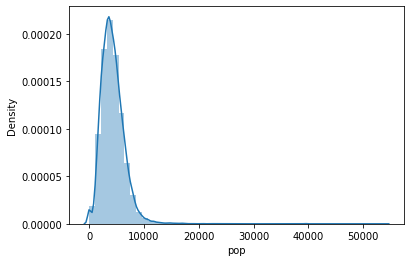

In [150]:
sns.distplot(train['pop'])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='male_pop', ylabel='Density'>

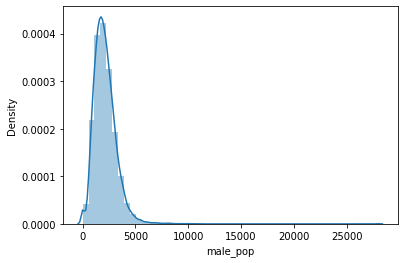

In [151]:
sns.distplot(train['male_pop'])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='female_pop', ylabel='Density'>

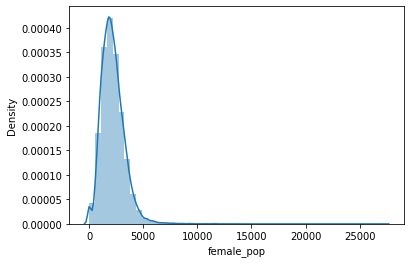

In [152]:
sns.distplot(train['female_pop'])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


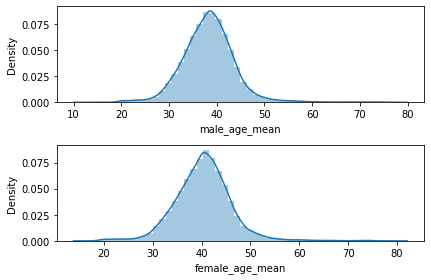

In [153]:
fig,(ax1,ax2)=plt.subplots(2,1) 
plt.subplots_adjust(wspace=0.8,hspace=0.9) 
sns.distplot(train['male_age_mean'],ax=ax1) 
sns.distplot(train['female_age_mean'],ax=ax2) 
plt.tight_layout() 
plt.show()


In [154]:
train['pop_density']=train['pop']/train['ALand']

In [155]:
test['pop_density']=test['pop']/test['ALand']

In [156]:
train['pop_density']

UID
267822    0.000026
246444    0.001687
245683    0.000099
279653    0.002442
247218    0.002207
            ...   
279212    0.002650
277856    0.000818
233000    0.000002
287425    0.000619
265371    0.000478
Name: pop_density, Length: 27321, dtype: float64

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


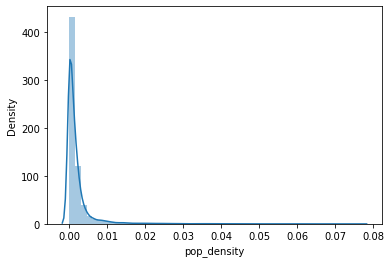

In [157]:
# check population density 
sns.distplot(train['pop_density']) 
plt.show()

In [158]:
train['age_median']=(train['male_age_median']+train['female_age_median'])/2

In [159]:
test['age_median']=(test['male_age_median']+test['female_age_median'])/2

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


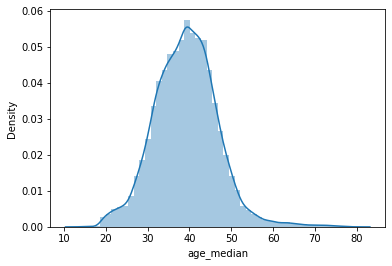

In [160]:
sns.distplot(train['age_median'])
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


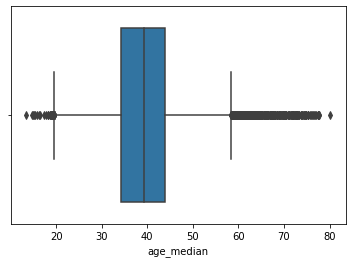

In [161]:
sns.boxplot(train['age_median'])
plt.show()

In [162]:
#Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

#Analyze the married, separated, and divorced population for these population brackets

#Visualize using appropriate chart type


In [163]:
train['pop_bins']=pd.cut(train['pop'],bins=5,labels=['very low','low','medium','high','very high'])

In [164]:
train['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

In [165]:
train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

<AxesSubplot:>

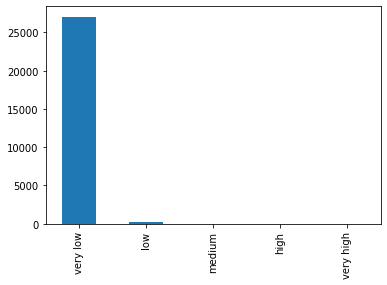

In [166]:
train['pop_bins'].value_counts().plot(kind='bar')

In [167]:
train.groupby(by='pop_bins')[['married','separated', 'divorced']].count()

,married,separated,divorced
pop_bins,,,
very low,27058,27058,27058
low,246,246,246
medium,9,9,9
high,7,7,7
very high,1,1,1


In [168]:
train.groupby(by='pop_bins')[['married','separated', 'divorced']].agg(['sum','mean','median','count'])

married                             separated            \
                   sum      mean    median  count        sum      mean   
pop_bins                                                                 
very low   13733.22489  0.507548  0.524680  27058  517.52126  0.019126   
low          143.88385  0.584894  0.593135    246    3.89480  0.015833   
medium         5.90163  0.655737  0.618710      9    0.04503  0.005003   
high           3.52351  0.503359  0.335660      7    0.05699  0.008141   
very high      0.73474  0.734740  0.734740      1    0.00405  0.004050   

                               divorced                             
             median  count          sum      mean    median  count  
pop_bins                                                            
very low   0.013650  27058  2719.430721  0.100504  0.096020  27058  
low        0.011195    246    18.535600  0.075348  0.070045    246  
medium     0.004120      9     0.593340  0.065927  0.064890      9  
high       0.002500      7     0.273210  0.039030  0.010320      7  
very high  0.004050      1     0.030360  0.030360  0.030360      1

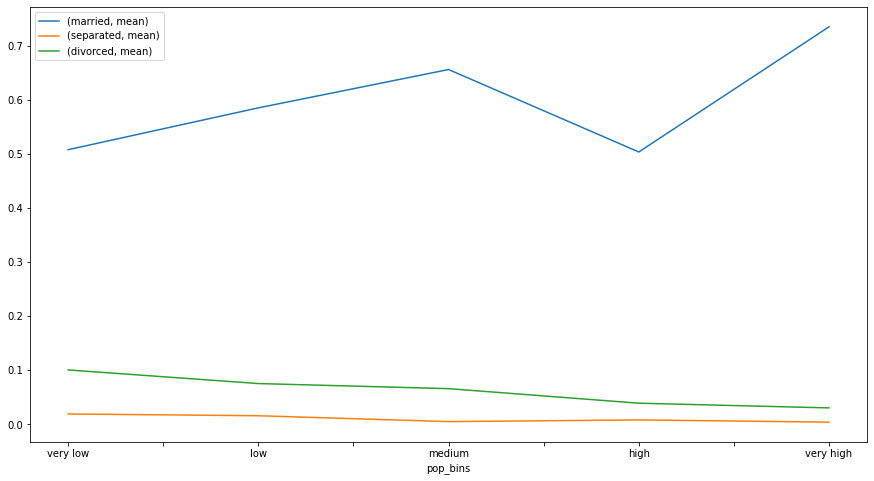

In [169]:
train.groupby(by='pop_bins')[['married','separated', 'divorced']].agg(['mean']).plot(figsize=(15,8)) 
plt.legend(loc='best')


In [170]:
#Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [171]:
rent_state_mean=train.groupby(by='state')['rent_mean'].agg(["mean"])

In [172]:
income_state_mean=train.groupby(by='state')['family_mean'].agg(['mean'])

In [173]:
income_state_mean.head()

,mean
state,
Alabama,67030.064213
Alaska,92136.545109
Arizona,73328.238798
Arkansas,64765.377850
California,87655.470820


In [174]:
# calculate rent percentage 
rent_perc=rent_state_mean['mean']/income_state_mean['mean']

In [175]:
#heat map
train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [176]:
num=train.select_dtypes(exclude='object')

In [177]:
num

,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,...,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,pop_density,age_median,pop_bins
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,13346,315,42.840812,-75.501524,2.021834e+08,1699120,5230,2612,...,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,0.000026,44.666665,very low
246444,141,18,46616,574,41.701441,-86.266614,1.560828e+06,100363,2633,1349,...,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274,0.001687,34.791665,very low
245683,63,18,46122,317,39.792202,-86.515246,6.956160e+07,284193,6881,3643,...,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512,0.000099,41.833330,very low
279653,127,72,927,787,18.396103,-66.104169,1.105793e+06,0,2700,1141,...,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086,0.002442,49.750000,very low
247218,161,20,66502,785,39.195573,-96.569366,2.554403e+06,0,5637,2586,...,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426,0.002207,22.000000,very low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279212,43,72,769,787,18.076060,-66.358379,6.970300e+05,0,1847,909,...,938.0,0.60422,0.24603,0.03042,0.02249,0.14683,0.00000,0.002650,40.916670,very low
277856,91,42,19422,215,40.158138,-75.307271,5.077337e+06,11786,4155,2116,...,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888,0.20908,0.000818,39.166665,very low
233000,87,8,80653,970,40.410316,-103.814003,1.323262e+09,17577610,2829,1465,...,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712,0.07857,0.000002,44.166665,very low


In [178]:
num.shape

(27321, 75)

In [179]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27321 entries, 267822 to 265371
Data columns (total 81 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTYID                     27321 non-null  int64   
 1   STATEID                      27321 non-null  int64   
 2   state                        27321 non-null  object  
 3   state_ab                     27321 non-null  object  
 4   city                         27321 non-null  object  
 5   place                        27321 non-null  object  
 6   type                         27321 non-null  object  
 7   primary                      27321 non-null  object  
 8   zip_code                     27321 non-null  int64   
 9   area_code                    27321 non-null  int64   
 10  lat                          27321 non-null  float64 
 11  lng                          27321 non-null  float64 
 12  ALand                        27321 non-null  float64 


In [180]:
num.corr()

,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,...,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,pop_density,age_median
COUNTYID,1.000000,0.224549,0.036527,0.067171,-0.149272,0.070414,0.015469,0.016550,-0.002662,-0.002615,...,0.004587,-0.001227,-0.004632,-0.021428,0.041710,0.069059,0.048850,-0.125892,-0.080509,-0.063521
STATEID,0.224549,1.000000,-0.261465,0.043718,0.109934,0.319964,-0.017275,-0.026476,-0.036599,-0.040351,...,-0.025104,-0.028238,0.069314,0.025763,-0.033283,0.030409,0.018748,-0.151007,-0.013671,-0.017172
zip_code,0.036527,-0.261465,1.000000,-0.004681,-0.070775,-0.926708,0.072711,0.031679,0.083058,0.099959,...,0.055497,0.059305,-0.069965,0.030217,0.020541,-0.048023,0.043310,-0.069348,-0.119014,-0.126150
area_code,0.067171,0.043718,-0.004681,1.000000,-0.125415,-0.013494,0.016563,0.021711,0.031834,0.034387,...,0.029857,0.031128,0.018877,0.057824,0.022687,0.022543,-0.043722,-0.003658,-0.030743,-0.017118
lat,-0.149272,0.109934,-0.070775,-0.125415,1.000000,0.025450,0.100498,0.067660,-0.078283,-0.072763,...,-0.080855,-0.087667,0.056487,0.035480,-0.158657,-0.138048,-0.056018,0.208792,0.054513,0.008246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
separated,0.069059,0.030409,-0.048023,0.022543,-0.138048,0.049228,-0.005904,-0.001208,-0.083182,-0.074929,...,-0.091913,-0.088709,-0.284877,-0.219686,0.668481,1.000000,0.133244,-0.151824,0.094859,-0.116763
divorced,0.048850,0.018748,0.043310,-0.043722,-0.056018,-0.004321,0.023381,0.007677,-0.160931,-0.146619,...,-0.198491,-0.169450,-0.095413,-0.267833,0.057364,0.133244,1.000000,-0.210203,-0.155328,0.164205
bad_debt,-0.125892,-0.151007,-0.069348,-0.003658,0.208792,-0.005876,-0.079618,-0.024112,0.099489,0.092085,...,0.078159,0.104039,0.134257,0.182985,-0.151008,-0.151824,-0.210203,1.000000,-0.005871,0.058892
pop_density,-0.080509,-0.013671,-0.119014,-0.030743,0.054513,0.066056,-0.044934,-0.013174,0.033740,0.020651,...,0.046016,0.040268,-0.426353,-0.248678,0.212778,0.094859,-0.155328,-0.005871,1.000000,-0.198546


In [181]:
cols=train.corr().nlargest(10,'hc_mortgage_mean')

<AxesSubplot:>

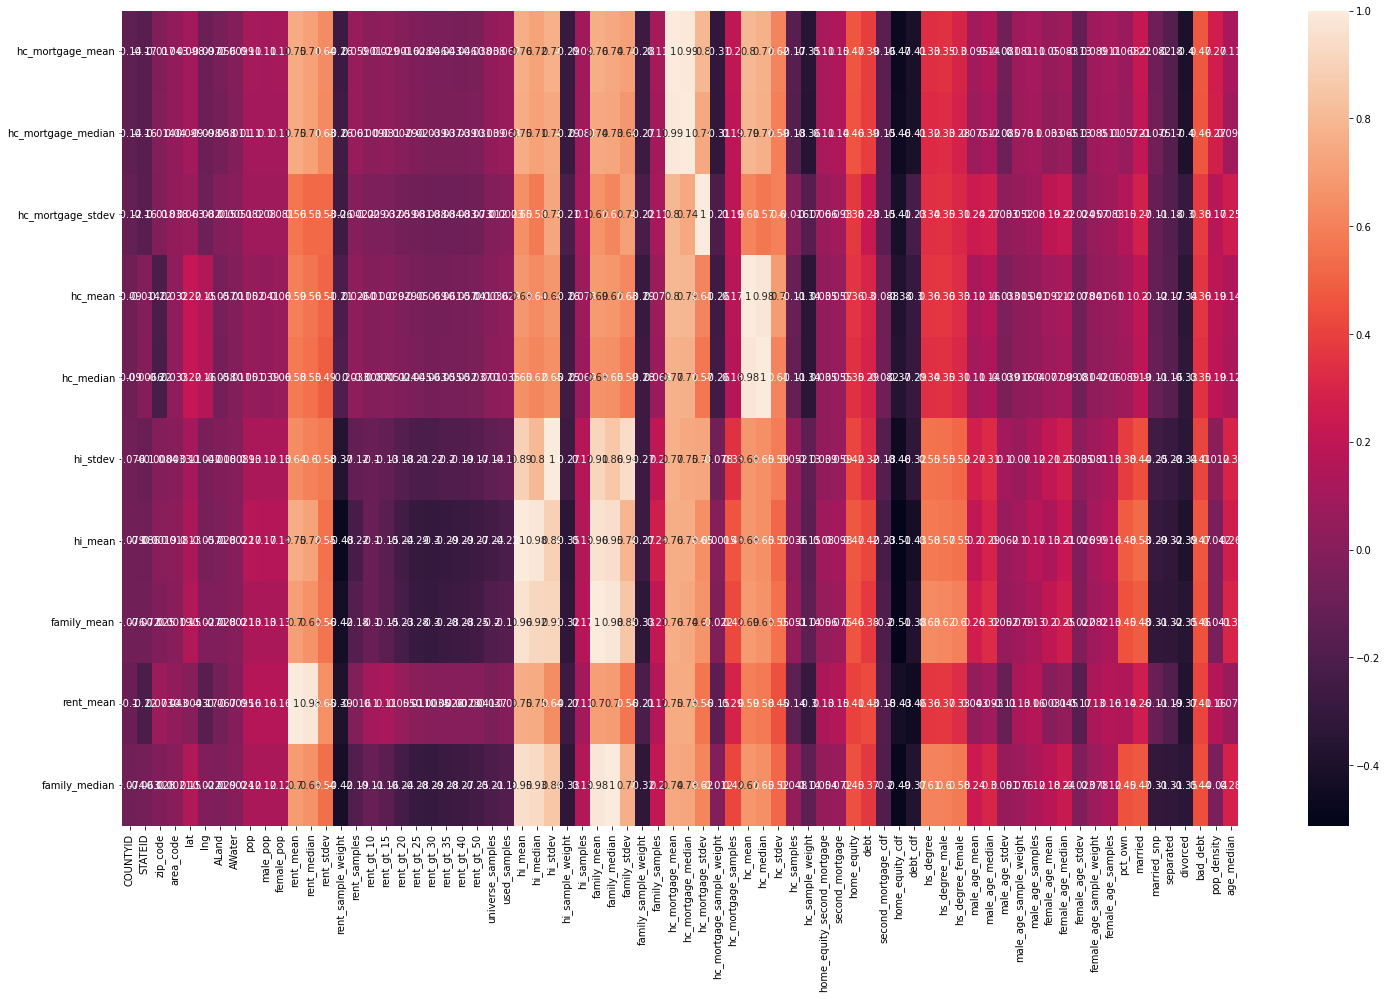

In [182]:
plt.figure(figsize=(25,15))
sns.heatmap(cols,annot=True)

In [184]:
#Data Pre-processing:

In [185]:
pip install factor_analyzer

Defaulting to user installation because normal site-packages is not writeable
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
konoha 4.6.5 requires overrides<4.0.0,>=3.0.0, which is not installed.
flair 0.8.1 requires more-itertools~=8.8.0, but you have more-itertools 8.2.0 which is incompatible.
konoha 4.6.5 requires importlib-metadata<4.0.0,>=3.7.0, but you have importlib-metadata 6.6.0 which is incompatible.
konoha 4.6.5 requires requests<3.0.0,>=2.25.1, but you have requests 2.23.0 which is incompatible.
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [186]:
from factor_analyzer import FactorAnalyzer

In [187]:
fa=FactorAnalyzer(n_factors=5)

In [189]:
fa.fit_transform(train.select_dtypes(exclude=('object','category')))

array([[-0.41205343,  0.51294274,  0.87903004, -1.11001903,  0.35041992],
       [-1.04824274, -0.50174344, -0.39507676,  0.081311  ,  0.32595819],
       [ 0.11209985,  1.26467376,  0.76773891, -0.47930207, -0.36363692],
       ...,
       [-0.02669751, -0.75106047,  0.77972285, -1.39880081,  0.03865004],
       [ 2.53195117,  3.0676096 ,  1.45490888, -0.07337594, -1.50506532],
       [-0.1992642 ,  0.01415226, -1.23527594,  0.25760531, -0.04155054]])

In [190]:
#Data Modeling :

In [191]:
train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [193]:
train['type']

UID
267822       City
246444       City
245683       City
279653      Urban
247218       City
           ...   
279212      Urban
277856    Borough
233000       City
287425       Town
265371       City
Name: type, Length: 27321, dtype: object

In [194]:
# convert type column into numerical data 
train.replace({'City':1,'Town':2,'CDP':3,'Village':4,'Borough':5,'Urban':6},inplace=True)

In [195]:
train['type'].value_counts()

1    15237
2     3666
3     3658
4     3216
5     1226
6      318
Name: type, dtype: int64

In [198]:
test.replace({'City':1,'Town':2,'CDP':3,'Village':4,'Borough':5,'Urban':6},inplace=True)

In [200]:
test['type'].value_counts()

1    6481
2    1634
3    1558
4    1356
5     509
6     171
Name: type, dtype: int64

In [202]:
train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [203]:
input_cols=['COUNTYID', 'STATEID','type','zip_code','pop','family_mean','second_mortgage', 'home_equity','debt','hs_degree','age_median','pct_own','married','separated', 'divorced']

In [204]:
x_train=train[input_cols]

In [205]:
x_train

,COUNTYID,STATEID,type,zip_code,pop,family_mean,second_mortgage,home_equity,debt,hs_degree,age_median,pct_own,married,separated,divorced
UID,,,,,,,,,,,,,,,
267822,53,36,1,13346,5230,67994.14790,0.02077,0.08919,0.52963,0.89288,44.666665,0.79046,0.57851,0.01240,0.08770
246444,141,18,1,46616,2633,50670.10337,0.02222,0.04274,0.60855,0.90487,34.791665,0.52483,0.34886,0.01426,0.09030
245683,63,18,1,46122,6881,95262.51431,0.00000,0.09512,0.73484,0.94288,41.833330,0.85331,0.64745,0.01607,0.10657
279653,127,72,6,927,2700,56401.68133,0.01086,0.01086,0.52714,0.91500,49.750000,0.65037,0.47257,0.02021,0.10106
247218,161,20,1,66502,5637,54053.42396,0.05426,0.05426,0.51938,1.00000,22.000000,0.13046,0.12356,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279212,43,72,6,769,1847,20889.14617,0.00000,0.00000,0.11694,0.60155,40.916670,0.60422,0.24603,0.02249,0.14683
277856,91,42,5,19422,4155,118896.06830,0.02112,0.19641,0.65364,0.95737,39.166665,0.68072,0.61127,0.02473,0.04888
233000,87,8,1,80653,2829,88878.57034,0.02024,0.07857,0.58095,0.93555,44.166665,0.78508,0.70451,0.00520,0.07712


In [207]:
y_train=train['hc_mortgage_mean']

In [208]:
y_train

UID
267822    1414.80295
246444     864.41390
245683    1506.06758
279653    1175.28642
247218    1192.58759
             ...    
279212     770.11560
277856    2210.84055
233000    1671.07908
287425    3074.83088
265371    1455.42340
Name: hc_mortgage_mean, Length: 27321, dtype: float64

In [214]:
x_test=test[input_cols]
y_test=test['hc_mortgage_mean']

In [211]:
from sklearn.preprocessing import StandardScaler

In [213]:
sc=StandardScaler()

In [216]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

In [217]:
#apply linear regression model 
from sklearn.linear_model import LinearRegression 
linear_reg=LinearRegression() 
linear_reg.fit(x_train_scaled,y_train) 
y_pred=linear_reg.predict(x_test_scaled)

In [218]:
y_pred

array([ 874.67481013, 1597.10903054, 1086.41351981, ..., 1915.00495942,
       1505.10480889, 1151.68011643])

In [219]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score 
print('Mean Squared error',np.sqrt(mean_squared_error(y_test,y_pred)))

Mean Squared error 325.0919574748077


In [220]:
#Run another model at State level. There are 52 states in USA.

In [221]:
train['STATEID'].unique()

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10])

In [224]:
for i in [20,1,45]: 
    print('state id-->',i) 
    x_train_nation=train[train['COUNTYID']==i][input_cols] 
    y_train_nation=train[train['COUNTYID']==i]['hc_mortgage_mean'] 
    x_test_nation=test[test['COUNTYID']==i][input_cols] 
    y_test_nation=test[test['COUNTYID']==i]['hc_mortgage_mean'] 
    x_train_scaled_nation=sc.fit_transform(x_train_nation) 
    x_test_scaled_nation=sc.fit_transform(x_test_nation) 
    linear_reg.fit(x_train_scaled_nation,y_train_nation) 
    yprd=linear_reg.predict(x_test_scaled_nation) 
    print('root Mean Squared error',np.sqrt(mean_squared_error(y_test_nation,yprd))) 
    print('R2 score',r2_score(y_test_nation,yprd))

state id--> 20
root Mean Squared error 307.9718899931471
R2 score 0.6046603766461811
state id--> 1
root Mean Squared error 307.7896199248688
R2 score 0.8104850042868166
state id--> 45
root Mean Squared error 225.62754461084364
R2 score 0.7888730697076223
